In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

csv_file_path='top200_1997.xlsx'

df = pd.read_excel(csv_file_path)
max_index = df['Return'].idxmax()
print(f'max_index:{max_index}')
df.head()

max_index:180


,證券代碼,簡稱,年月,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,...,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率,Return,ReturnMean_year_Label
0,19972330.0,台積電,199712.0,457105.0,15.24,3.4636,0.89594,1.41640,0.144140,0.223790,...,0.408870,0.55256,223.86,177.18,5.99,6.34,-18.13,-8.00,-6.3648,1.0
1,2303.0,聯電,199712.0,263536.0,20.55,9.1333,1.27240,3.38550,0.111460,0.145880,...,0.388200,0.30889,338.15,303.48,5.27,6.80,-41.39,27.37,-18.0049,1.0
2,2002.0,中鋼,199712.0,181781.0,5.53,2.6209,0.35770,0.42117,0.077890,0.136380,...,0.160150,0.75094,85.46,26.60,4.10,22.41,44.39,63.01,-9.2224,1.0
3,1303.0,南亞,199712.0,175637.0,14.81,6.6116,0.74949,0.40821,0.035977,0.099458,...,0.061046,1.76440,133.30,80.55,4.36,7.00,8.65,-15.94,-12.0864,1.0
4,2357.0,華碩,199712.0,166991.0,158.47,7.0746,2.59620,2.39490,0.300880,0.356970,...,0.329330,0.18643,556.46,476.72,7.60,23.93,52.07,84.82,46.2737,1.0


In [2]:
from sklearn.preprocessing import StandardScaler

columns_to_exclude = ['簡稱', '證券代碼', '年月','ReturnMean_year_Label']

# 排除指定的欄位
features_to_scale = df.drop(columns=columns_to_exclude)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# 將標準化後的特徵資料轉換為 DataFrame
df_feat = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
df_feat.head()

,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,營業利益率OPM,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率,Return
0,9.522117,-0.335092,-0.060623,-0.370416,-0.312907,1.454294,1.423924,2.971872,2.582918,-0.611436,0.183285,0.525878,-0.088286,-0.248544,-0.105409,-0.413608,0.412850
1,5.231831,-0.259893,-0.038129,-0.264764,0.162296,0.884739,0.519556,0.682545,2.402131,-1.081365,1.174071,1.744121,-0.113169,-0.224163,-0.110777,-0.292221,0.056837
2,3.419803,-0.472602,-0.063967,-0.521471,-0.553085,0.299672,0.409282,1.670479,0.407519,-0.228851,-1.016512,-0.926561,-0.153606,0.603203,-0.090981,-0.169907,0.325450
3,3.283627,-0.341182,-0.048133,-0.411517,-0.556213,-0.430800,-0.019304,0.082855,-0.459282,1.725653,-0.601785,-0.406180,-0.144620,-0.213562,-0.099229,-0.440858,0.237855
4,3.091996,1.693289,-0.046297,0.106755,-0.076766,4.186002,2.969858,2.153807,1.887231,-1.317535,3.066612,3.415131,-0.032643,0.683767,-0.089208,-0.095057,2.022799


In [ ]:
#選擇特定欄位分析
#from sklearn.preprocessing import StandardScaler

# 指定要選擇的欄位
#selected_columns = ['特定欄位1', '特定欄位2', '特定欄位3']

# 選擇指定的欄位
#features_to_scale = df[selected_columns]

#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features_to_scale)

# 將標準化後的特徵資料轉換為 DataFrame
#df_feat = pd.DataFrame(scaled_features, columns=selected_columns)
#df_feat.head()


In [3]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_feat
y = df['ReturnMean_year_Label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [4]:
#使用KNN演算法
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=29,p=2,weights='distance',algorithm='brute')
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=29, weights='distance')

In [5]:
clf.predict(X_test)

array([-1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1, -1], dtype=int64)

In [6]:
clf.score(X_test,y_test)

0.8166666666666667

In [7]:
clf.score(X_train,y_train)

1.0

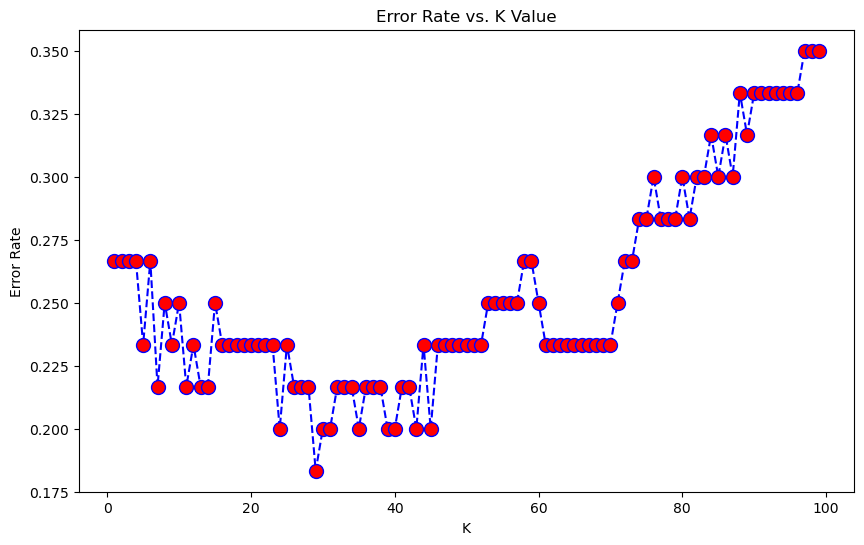

In [8]:
error_rate = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='distance', algorithm='brute')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# 將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [37]:
min_error = min(error_rate)
optimal_k = error_rate.index(min_error) + 1  # Adding 1 because Python indexing starts from 0

print(f"Optimal k value for minimum error rate: {optimal_k}")
print(f"Minimum Error Rate: {min_error}")

Optimal k value for minimum error rate: 29
Minimum Error Rate: 0.18333333333333332


In [47]:
predict_label1={}
predict_k_pre5={}

In [78]:
for year in range(1998,2010):
    csv_file_path = f'top200_{year}.xlsx'
    new = pd.read_excel(csv_file_path)
    #--------------
    top5_indices = new['Return'].nlargest(1).index

    print("Top 5 indices:", top5_indices)
    #----------------------
    # 排除指定的欄位
    features_to_scale_new = new.drop(columns=columns_to_exclude)

    # 使用之前訓練好的標準化物件進行標準化
    scaled_features_new = scaler.transform(features_to_scale_new)

    # 將標準化後的特徵資料轉換為 DataFrame
    df_feat_new = pd.DataFrame(scaled_features_new, columns=features_to_scale_new.columns)

    # 使用已經訓練好的模型進行預測
    predictions_new = clf.predict(df_feat_new)

    #------------------------------
    #測試KNN演算法的好壞
    from sklearn.metrics import classification_report,confusion_matrix
    #將實際類別分為真正例（True Positive）、真負例（True Negative）、偽正例（False Positive）和偽負例（False Negative）
    print('confusion_matrix:')
    print(confusion_matrix(new['ReturnMean_year_Label'],predictions_new))

    #模型的精確度、召回率、F1分數和支持數等指標，用來評估模型對於每個類別的預測性能。
    print('classification_report')
    print(classification_report(new['ReturnMean_year_Label'],predictions_new))

    # 比較預測結果
    accuracy_new = clf.score(df_feat_new, new['ReturnMean_year_Label'])
    print(f'新數據的預測準確率: {accuracy_new}')
    #---------------------------------------
    #print(predictions_new)

    predicted_positive_indices = (predictions_new == 1)

    # 獲取股票名稱
    predicted_positive_stock_names = new.loc[predicted_positive_indices, '簡稱']

    # 設定檔案名稱
    output_file_name = 'selected_stocks_1998.csv'

    # 匯出成 CSV 檔案
    predicted_positive_stock_names.to_csv(output_file_name, index=True)

    # 預測要投資的股票名稱
    print("選擇股票:")
    print(predicted_positive_stock_names)


    # 選擇預測為1的股票
    selected_stocks = new[predictions_new == 1]

    # 計算return
    stock_returns = selected_stocks['Return']

    portfolio_returns = (stock_returns.mean()/100)+1
    
    print(portfolio_returns)
    predict_label1[year]=portfolio_returns

    # 使用 kneighbors 方法取得最近鄰居的索引和距離
    #distances, indices = clf.kneighbors(df_feat_new)
    distances, indices = clf.kneighbors(df_feat_new, n_neighbors=5)
    # 合併所有測試樣本的最近鄰居索引
    all_indices = np.concatenate(indices)
    all_distances = np.concatenate(distances)

    # 將索引和距離組合成一個 2D 陣列，方便排序
    combined_data = np.column_stack((all_indices, all_distances))

    # 按照距離重新排序
    sorted_combined_data = combined_data[np.argsort(combined_data[:, 1])]

    # 選取最近鄰居中預測值為1的前5筆，且不重複
    selected_indices = set()
    i = 0
    while len(selected_indices) < 5 and i < len(sorted_combined_data):
        index = int(sorted_combined_data[i, 0])
        #index=int(indices[int(top5_indices[0])][i])
        prediction = predictions_new[index]
        if prediction == 1 and index not in selected_indices:
            selected_indices.add(index)
        i += 1

    # 將選取的索引轉換成列表
    selected_indices_list = list(selected_indices)
    #selected_indices_list = list(indices[180][:5])

    # 打印最近鄰居中預測值為1的前5筆索引
    print("最近鄰居中預測值為1的前5筆索引:")
    print(selected_indices_list)
    select = pd.read_excel(csv_file_path)
    # 獲取股票名稱
    selects_stock = select.loc[selected_indices_list,'簡稱']
    print(selects_stock)
    # 獲取股票return
    selects_ret = select.loc[selected_indices_list,'Return']
    print(selects_ret)
    # 計算return
    stock_returns = (selects_ret.mean() / 100)+1
    portfolio_returns = stock_returns
    print(portfolio_returns)
    predict_k_pre5[year]=portfolio_returns
    #print(stock_returns)

Top 5 indices: Index([146], dtype='int64')
confusion_matrix:
[[109  17]
 [ 10  64]]
classification_report
              precision    recall  f1-score   support

          -1       0.92      0.87      0.89       126
           1       0.79      0.86      0.83        74

    accuracy                           0.86       200
   macro avg       0.85      0.86      0.86       200
weighted avg       0.87      0.86      0.87       200

新數據的預測準確率: 0.865
選擇股票:
0       台積電       
1      華碩         
2      南亞         
3      中鋼         
4      台塑         
          ...     
188     中興電       
190    台揚         
191     劍湖山       
193    華夏         
199    東泥         
Name: 簡稱, Length: 81, dtype: object
1.6303392716049383
最近鄰居中預測值為1的前5筆索引:
[4, 9, 80, 49, 120]
4      台塑         
9      宏電         
80     碧悠         
49     凌陽         
120    智邦         
Name: 簡稱, dtype: object
4       46.8071
9      191.3663
80      41.8494
49      80.2007
120    153.0937
Name: Return, dtype: float64
2.0266344
Top 

Top 5 indices: Index([146], dtype='int64')
confusion_matrix:
[[68 47]
 [ 5 80]]
classification_report
              precision    recall  f1-score   support

          -1       0.93      0.59      0.72       115
           1       0.63      0.94      0.75        85

    accuracy                           0.74       200
   macro avg       0.78      0.77      0.74       200
weighted avg       0.80      0.74      0.74       200

新數據的預測準確率: 0.74
選擇股票:
0       台積電       
1      鴻海         
2       台塑化       
3       中華電       
4      南亞         
          ...     
191    普安         
192    華固         
194     大聯大       
197     金像電       
199    年興         
Name: 簡稱, Length: 127, dtype: object
1.258975937007874
最近鄰居中預測值為1的前5筆索引:
[8, 9, 22, 23, 26]
8      聯發科       
9     台塑         
22    遠傳         
23     奇美電       
26     光寶科       
Name: 簡稱, dtype: object
8     37.0692
9     77.8561
22    19.4770
23    94.4106
26     5.3446
Name: Return, dtype: float64
1.468315
Top 5 indices: Index([155]

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
sum1=1
sum2=1
print(predict_label1)
for k in predict_label1.keys():
    if not (predict_label1[k]==0):
        sum1=predict_label1[k]*sum1
print(f'複利為:{sum1}')
print('\n')
print(predict_k_pre5)
for k in predict_k_pre5.keys():
    if not (predict_k_pre5[k]==0):
        sum2=predict_k_pre5[k]*sum2
print(f'複利為:{sum2}')

{1998: 1.6303392716049383, 1999: 0.8807490625, 2000: 1.6343445, 2001: 1.2148711851851852, 2002: 1.3708020884615384, 2003: 1.1332904352, 2004: 1.3383051056451614, 2005: 1.4003270091275168, 2006: 1.258975937007874, 2007: 0.6069166384615385, 2008: 2.113739386740331, 2009: 0.0}
複利為:13.406101741937583


{1998: 2.0266344, 1999: 0.7972876, 2000: 2.5389992, 2001: 0.738245, 2002: 1.16984654, 2003: 1.0304298, 2004: 1.3845315999999999, 2005: 1.4271434, 2006: 1.468315, 2007: 0.6086548, 2008: 2.0236948, 2009: 0.0}
複利為:13.046877695585286
